Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

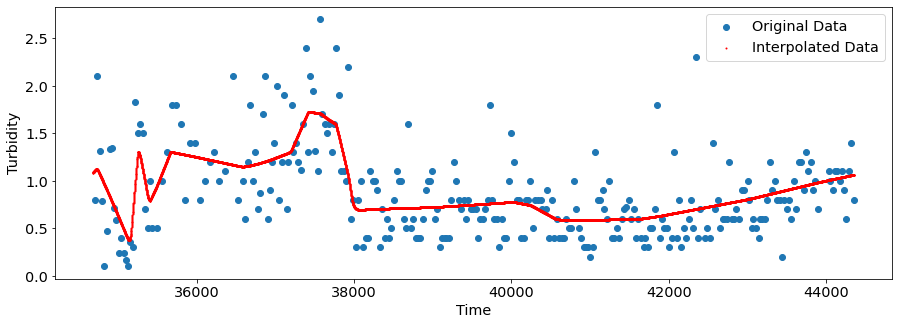

313/313 [==============================] - 0s 369us/step - loss: 3.8371e-16
['loss']


In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation/Turbidity/saved_model/my_modelBB02_Turbidity')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/Turbidity_data/BB02.csv")
time = df['time'].values
turbidity = df['turbidity'].values
df

#Transform the normalized scale to real scale
turbidity_min = 0.1
turbidity_max = 2.7
time_min = 34708.00                
time_max = 44354.49                       

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(turbidity_max - turbidity_min) + turbidity_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, turbidity*(turbidity_max - turbidity_min) + turbidity_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Turbidity')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [3]:
interpolation = model.predict([0.078681444
,0.084797656
,0.091121198
,0.097444739
,0.103768281
,0.110091822
,0.116519029
,0.122635241
,0.128958783
,0.138495927
,0.141605866
,0.147929407
,0.154356613
,0.160472826
,0.166796367
,0.173119909
,0.176333512
,0.179443451
,0.185766992
,0.192194198
,0.801016489
,0.955684096
,0.958794035
,0.962007638
])
interpolation

array([[0.30845755],
       [0.35362223],
       [0.40195528],
       [0.4502884 ],
       [0.46145773],
       [0.457611  ],
       [0.45370114],
       [0.44998053],
       [0.44608563],
       [0.439838  ],
       [0.4378007 ],
       [0.43365824],
       [0.42944786],
       [0.42544118],
       [0.42129868],
       [0.4171562 ],
       [0.41505104],
       [0.41301376],
       [0.40872055],
       [0.4048512 ],
       [0.23777594],
       [0.3423056 ],
       [0.3444185 ],
       [0.34660172]], dtype=float32)